In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_rating = pd.read_csv("data/banijay_op1data_ratings_raw.csv", delimiter=";", decimal=',')
df_content = pd.read_csv("data/banijay_op1data_content_processed.csv")

In [2]:
df_rating.isna().any()

Datum             False
Time              False
Program           False
Station           False
Target Group      False
Broadcast Type    False
Ratings Type      False
Kdh%               True
Kdh000             True
Zadl%              True
dtype: bool

In [2]:
df_rating.shape

(1304190, 10)

In [3]:
df_rating.columns

Index(['Datum', 'Time', 'Program', 'Station', 'Target Group', 'Broadcast Type',
       'Ratings Type', 'Kdh%', 'Kdh000', 'Zadl%'],
      dtype='object')

In [4]:
df_rating["Target Group"].value_counts()

tot6plus              130419
boodschapper_20_49    130419
boodschapper_25_54    130419
6_12_jr               130419
13_19_jr              130419
20_34_jr              130419
35_49_jr              130419
50plus_jr             130419
m_6plus_jr            130419
v_6plus_jr            130419
Name: Target Group, dtype: int64

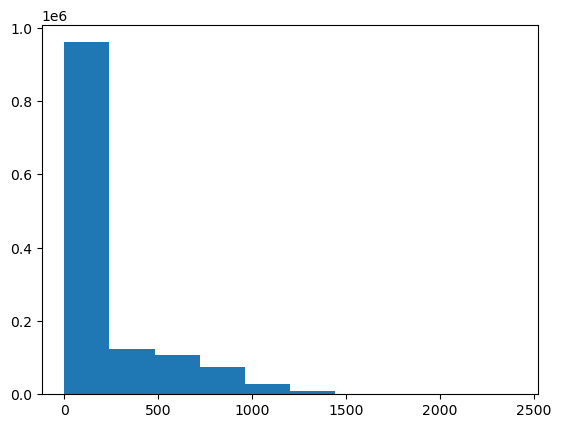

In [5]:
df_rating['Kdh000'].head(10)

plt.hist(df_rating['Kdh000'])
plt.show()

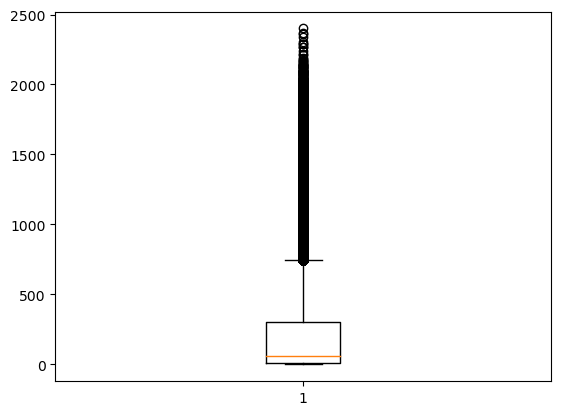

In [6]:
df_rating.fillna(0, inplace=True)
plt.boxplot(df_rating['Kdh000'])
plt.show()

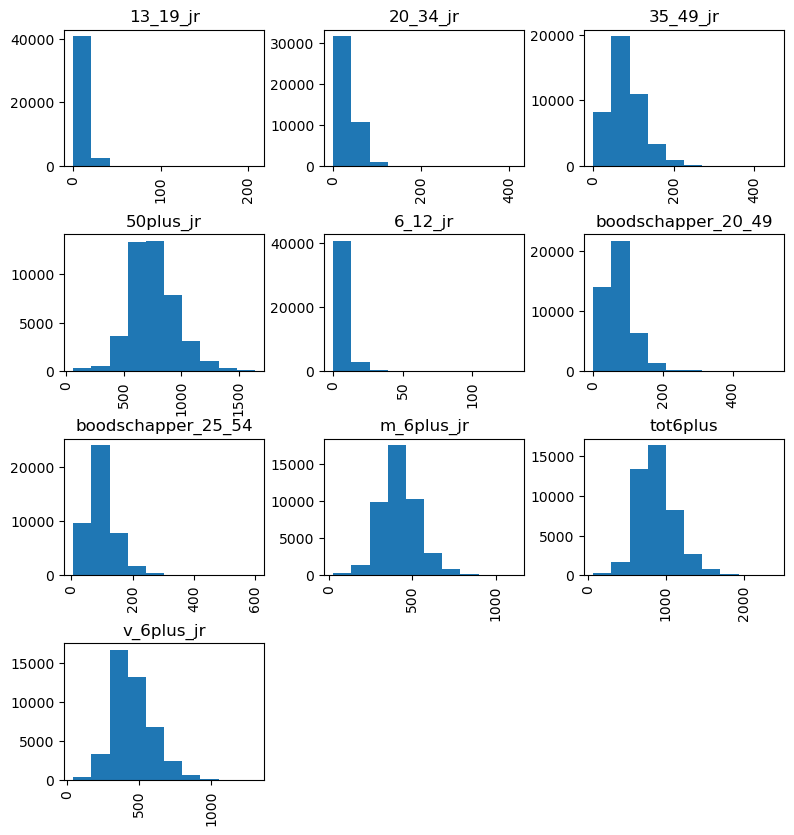

In [2]:
rating_type_totaal = df_rating[df_rating['Ratings Type'] == 'totaal']
import matplotlib.pyplot as plt

rating_type_totaal['Kdh000'].hist(by=rating_type_totaal['Target Group'], figsize=(9, 10))
plt.savefig('Visualizations/Histograms_for_each_Target_Group.png', dpi=300)

In [4]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, DatetimeTickFormatter, NumeralTickFormatter
from bokeh.layouts import gridplot

rating_type_totaal['Datum'] = pd.to_datetime(rating_type_totaal['Datum'].astype(str).str[:-3])
rating_type_totaal_date = rating_type_totaal.groupby(['Datum', 'Target Group'], as_index=False)['Kdh000'].mean()

# Interactive visualisation with bokeh for each Target Group
plots = []
for target_group in rating_type_totaal_date['Target Group'].unique():
    df = rating_type_totaal_date.loc[rating_type_totaal_date['Target Group'] == target_group]
    source = ColumnDataSource(data=df)
    TOOLTIPS = [('Rating', '@Kdh000')]
    fig = figure(x_axis_label='Date', y_axis_label='Rating', tooltips=TOOLTIPS)
    fig.line(x='Datum', y='Kdh000', source=source, legend_label=target_group)
    fig.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')
    plots.append(fig)

output_file(filename='Line_chart_for_each_Target_group.html')
show(gridplot(plots, ncols=2))

C:\Users\mened\AppData\Local\Temp\ipykernel_42028\3942096189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_type_totaal['Datum'] = pd.to_datetime(rating_type_totaal['Datum'].astype(str).str[:-3])


In [9]:
df_rating["date_time"] = pd.to_datetime(df_rating["Datum"].astype("str") + ' ' + df_rating["Time"].astype(str), infer_datetime_format=True)

In [10]:
df_content["date_time_start"] = pd.to_datetime(df_content["date_time_start"], infer_datetime_format=True)
df_content["date_time_end"] = pd.to_datetime(df_content["date_time_end"], infer_datetime_format=True)

In [16]:
lookup_table = df_rating[['Datum', "date_time"]]

In [17]:
lookup_table.drop_duplicates(keep="first", inplace=True)

C:\Users\mened\AppData\Local\Temp\ipykernel_22452\2137511821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lookup_table.drop_duplicates(keep="first", inplace=True)


In [19]:
from tqdm import tqdm

# Nested loop, which matches the content and rating data
for index, row in tqdm(lookup_table.iterrows()):
    for index_2, row_2 in df_content.iterrows():
        if row_2['date_time_start'] <= row['date_time'] and row_2['date_time_end'] >= row['date_time']:
            lookup_table.loc[index, 'content_id'] = row_2['content_id']

0it [00:00, ?it/s]c:\Users\mened\anaconda3\lib\site-packages\tqdm\std.py:1195: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  for obj in iterable:
C:\Users\mened\AppData\Local\Temp\ipykernel_22452\2084294902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lookup_table.loc[index, 'content_id'] = row_2['content_id']
1it [00:00,  4.90it/s]c:\Users\mened\anaconda3\lib\site-packages\tqdm\std.py:1195: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64

In [11]:
# I remove the fragment now, so I can have the unique values of the id's.
df_content['content_id'] = df_content['content_id'].str[:-3]
df_content.to_csv("data/banijay_op1data_content_processed.csv")

In [13]:
df_content['content_id']

0       WON02197428
1       WON02197428
2       WON02197428
3       WON02197428
4       WON02290378
           ...     
2979    WON02251309
2980    WON02251309
2981    WON02340053
2982    WON02340053
2983    WON02340053
Name: content_id, Length: 2984, dtype: object

In [ ]:
df_rating.to_csv('data/banijay_op1data_ratings_processed.csv', compression="zip")

In [29]:
lookuptable = lookup_table[["date_time", "content_id"]]
lookuptable['content_id'] = lookuptable['content_id'].str[: -3]
lookuptable.to_csv('data/banijay_op1data_ratings_lookuptable.csv')

,date_time,content_id
0,2020-01-06 22:18:00,WON02123548_01
30,2020-01-06 22:19:00,WON02123548_01
60,2020-01-06 22:20:00,WON02123548_01
90,2020-01-06 22:21:00,WON02123548_01
120,2020-01-06 22:22:00,WON02123548_01
...,...,...
1304040,2022-10-20 23:48:00,NaN
1304070,2022-10-20 23:49:00,NaN
1304100,2022-10-20 23:50:00,NaN
1304130,2022-10-20 23:51:00,NaN


In [24]:
lookuptable.head(30)

,date_time,content_id
0,2020-01-06 22:18:00,WON02123548_01
30,2020-01-06 22:19:00,WON02123548_01
60,2020-01-06 22:20:00,WON02123548_01
90,2020-01-06 22:21:00,WON02123548_01
120,2020-01-06 22:22:00,WON02123548_01
150,2020-01-06 22:23:00,WON02123548_01
180,2020-01-06 22:24:00,WON02123548_01
210,2020-01-06 22:25:00,WON02123548_01
240,2020-01-06 22:26:00,WON02123548_01
270,2020-01-06 22:27:00,WON02123548_01


In [25]:
new_df_rating = pd.merge(df_rating, lookuptable, on='date_time')
new_df_rating.to_csv('data/banijay_op1data_ratings_processed.csv', compression="zip")

In [26]:
merged_tables = pd.merge(df_content, new_df_rating, on="content_id")

In [ ]:
merged_tables.to_csv('data/banijay_op1data_content_ratings.csv', compression='zip')